# pri-miRNA final: figures for paper
## Boxplots and Deseq2

#### comments

In [1]:
# use normalization approach against library size (total reads)
# use deseq2 for Volcano plots



In [2]:
library("ggplot2")
library("ggpubr")
library("stringr")
library("gplots")
library("viridis")
#library("VennDiagram")
library("preprocessCore")
library(tidyverse)


library(DESeq2)

#citation("DESeq2")
library(calibrate)
library(eulerr)
library(cluster)
library(ComplexHeatmap)
#library(data.table)
library(nortest)
library(RColorBrewer)
library(dplyr)
library(data.table)

Loading required package: magrittr


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: viridisLite

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract()   masks magrittr::extract()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ purrr::set_names() masks magrittr::set_names()

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parL

In [3]:
#citation('ggplot2')

In [7]:
rm(list=ls())
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
options(stringsAsFactors = FALSE)


In [8]:
# final colors
# will show sh1, sh3, sh6, sh7, sh11, wt, eq, drosha
col_shgfp <- "gray30"
col_sh1 <- '#9E0142'
col_sh3 <- '#E55649'
col_sh6 <- '#FDAE61'
col_sh7 <- '#FEE08B'
col_sh11 <- '#3288BD'
col_drosha <- "#66C2A5"
col_wt <- '#60258a'
col_eq <- '#4957A4'

ownCol <- c(col_shgfp, col_sh1, col_sh3, col_sh6, col_sh7, col_sh11, col_drosha, col_wt, col_eq)

## files

### read files: consider only "dox" samples
#### rsem output

In [9]:
# Sadat has following samples:
# 20190912: hela shgfp, shints1, shints11                                     
# 20190606: hela shgfp, shints1, shints11, 3d, 1ug dox
# 20190326: hela shgfp, shints1, shints4, shints9, shints11
# 20190724: hela shints3, shints4, shints7, shints9, 3d, 1ug dox  
# 202010: hela shgfp, shints6

# Ezra has the following samples
# 20190510: hela shgfp, shints11 (Ali?)
# 20191103: hela rescue: empty, wt, eq

In [10]:
# final samples to use:

# shgfp, sh1, sh3, sh7, sh11 from the Jun2019 set, 
# sh6 from Oct 2020 set
# siCtrl, siDrosha

##### Input files: rsem counts

##### shINTS

In [14]:
hela_shgfp_dox_r1 <- read.delim("hela_shgfp_dox_r1_trim_primir.genes.results", header=TRUE, sep="\t")
hela_shgfp_dox_r2 <- read.delim("hela_shgfp_dox_r2_trim_primir.genes.results", header=TRUE, sep="\t")

hela_shints1_dox_r1 <- read.delim("hela_shints1_dox_r1_trim_primir.genes.results", header=TRUE, sep="\t")
hela_shints1_dox_r2 <- read.delim("hela_shints1_dox_r2_trim_primir.genes.results", header=TRUE, sep="\t")

hela_shint3_dox_r1 <- read.delim("hela_shints3_dox_r1_trim_primir.genes.results", header=TRUE, sep="\t")
hela_shint3_dox_r2 <- read.delim("hela_shints3_dox_r2_trim_primir.genes.results", header=TRUE, sep="\t")

hela_shint7_dox_r1 <- read.delim("hela_shints7_dox_r1_trim_primir.genes.results", header=TRUE, sep="\t")
hela_shint7_dox_r2 <- read.delim("hela_shints7_dox_r2_trim_primir.genes.results", header=TRUE, sep="\t")

hela_shints11_dox_r1 <- read.delim("hela_shints11_dox_r1_trim_primir.genes.results", header=TRUE, sep="\t")
hela_shints11_dox_r2 <- read.delim("hela_shints11_dox_r2_trim_primir.genes.results", header=TRUE, sep="\t")


##### shINTS6 Oct2020

In [12]:
hela3_shgfp_dox_r1 <- read.delim("hela3_shgfp_dox_r1_trim_primir.genes.results", header=TRUE, sep="\t")
hela3_shgfp_dox_r2 <- read.delim("hela3_shgfp_dox_r1_trim_primir.genes.results", header=TRUE, sep="\t")

hela3_shints6_dox_r1 <- read.delim("hela3_shints6_dox_r1_trim_primir.genes.results", header=TRUE, sep="\t")
hela3_shints6_dox_r2 <- read.delim("hela3_shints6_dox_r1_trim_primir.genes.results", header=TRUE, sep="\t")

##### RNA-seq siDrosha

In [11]:
hela_siC_total_r1 <- read.delim("hela_siC_r1_trim_primir.genes.results", header=TRUE, sep="\t")
hela_siC_total_r2 <- read.delim("hela_siC_r2_trim_primir.genes.results", header=TRUE, sep="\t")

hela_siDrosha_total_r1 <- read.delim("hela_siDrosha_r1_trim_primir.genes.results", header=TRUE, sep="\t")
hela_siDrosha_totala_r2 <- read.delim("hela_siDrosha_r2_trim_primir.genes.results", header=TRUE, sep="\t")

In [13]:
myfiles <- ls(pattern="_r[1,2]")
myfiles

[1] "hela_shgfp_dox_r1"       "hela_shgfp_dox_r2"      
 [3] "hela_shint3_dox_r1"      "hela_shint3_dox_r2"     
 [5] "hela_shint7_dox_r1"      "hela_shint7_dox_r2"     
 [7] "hela_shints1_dox_r1"     "hela_shints1_dox_r2"    
 [9] "hela_shints11_dox_r1"    "hela_shints11_dox_r2"   
[11] "hela_siC_total_r1"       "hela_siC_total_r2"      
[13] "hela_siDrosha_total_r1"  "hela_siDrosha_totala_r2"
[15] "hela3_shgfp_dox_r1"      "hela3_shgfp_dox_r2"     
[17] "hela3_shints6_dox_r1"    "hela3_shints6_dox_r2"

# 1) read all data

### Create data frame with all samples

In [15]:
head(hela_shints11_dox_r1, n=2)

,gene_id,transcript_id.s.,length,effective_length,expected_count,TPM,FPKM
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000010310,"ENST00000263281,ENST00000304207,ENST00000585889,ENST00000588816,ENST00000590918,ENST00000591224,ENST00000591322,ENST00000593127",2267.21,2193.11,25.11,54.03,25.83
2,ENSG00000011677,"ENST00000370314,ENST00000417858,ENST00000497894,ENST00000535043",2445.50,2371.40,297.00,591.06,282.55


In [17]:
d <- as.data.frame(hela_shgfp_dox_r1[,1])

In [29]:
# all samples in one data frame

# read the data
d <- as.data.frame(hela_shgfp_dox_r1[,1])
colnames(d) <- "gene_id"
for (i in 1:length(myfiles)){
        n <- get(myfiles[i])
        d[,i+1] <- n[,5] # expected_count column!!!
    }
colnames(d) <- c("gene_id", myfiles)

# name rows
rownames(d) <- d$gene_id
d <- d[,-1]
head(d)
nrow(d)

,hela_shgfp_dox_r1,hela_shgfp_dox_r2,hela_shint3_dox_r1,hela_shint3_dox_r2,hela_shint7_dox_r1,hela_shint7_dox_r2,hela_shints1_dox_r1,hela_shints1_dox_r2,hela_shints11_dox_r1,hela_shints11_dox_r2,hela_siC_total_r1,hela_siC_total_r2,hela_siDrosha_total_r1,hela_siDrosha_totala_r2,hela3_shgfp_dox_r1,hela3_shgfp_dox_r2,hela3_shints6_dox_r1,hela3_shints6_dox_r2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000010310,47.00,51.0,30.00,23.00,149.00,136.00,143.00,142.00,25.11,23.00,16.00,10.00,4.0,7.00,32.00,39,50,58
ENSG00000011677,375.00,393.0,135.00,122.00,154.00,173.00,186.00,187.00,297.00,319.00,254.00,255.00,414.0,371.00,169.00,205,130,135
ENSG00000033170,1594.00,1925.0,1765.00,1689.00,1875.00,1919.00,4829.96,5062.99,1186.00,1006.00,591.00,601.00,922.0,784.00,620.00,724,646,787
ENSG00000048991,2076.00,2392.0,917.00,819.00,1277.00,1331.00,1676.00,1440.00,1741.00,1815.00,1043.00,1256.00,995.0,822.00,753.00,897,642,783
ENSG00000062716,11591.56,14018.6,15801.97,13651.96,12573.99,13138.97,40630.06,44288.06,24266.28,27557.18,23205.93,23509.75,28220.7,19130.93,4249.82,4261,11508,14961
ENSG00000063660,457.00,169.0,3045.00,2936.00,3152.00,3752.00,341.00,418.00,516.00,291.00,615.00,682.00,342.0,963.00,1766.00,2014,2423,2285


[1] 267

### assign gene names

In [30]:
# replace ENSEMBL ID by gene names
genes <- fread("/media/labdisk/data/users/nina/totalrna/20191001_primirna_stringtie/final_annot_v87_v99_StringTie/primir_final_annotation_v87_v99_StringTie_hg19.gtf", header=F)[,c(1,9)]

# remove all rows that are duplicated in ENSG_id
genes <- genes[!duplicated(str_extract(genes$V9,"ENSG[0-9]*")),]


head(genes)
nrow(genes)

V1,V9
<chr>,<chr>
chr1,"gene_id ""ENSG00000066136""; gene_version ""15""; gene_name ""NFYC""; gene_source ""ensembl_havana""; gene_biotype ""protein_coding"";"
chr1,"gene_id ""ENSG00000198974""; gene_version ""1""; gene_name ""MIR30E""; gene_source ""ensembl""; gene_biotype ""miRNA"";"
chr1,"gene_id ""ENSG00000207962""; gene_version ""1""; gene_name ""MIR30C1""; gene_source ""ensembl""; gene_biotype ""miRNA"";"
chr1,"gene_id ""ENSG00000199135""; gene_version ""1""; gene_name ""MIR101-1""; gene_source ""ensembl""; gene_biotype ""miRNA"";"
chr1,"gene_id ""ENSG00000132485""; gene_version ""8""; gene_name ""ZRANB2""; gene_source ""ensembl_havana""; gene_biotype ""protein_coding"";"
chr1,"gene_id ""ENSG00000207721""; gene_version ""1""; gene_name ""MIR186""; gene_source ""ensembl""; gene_biotype ""miRNA"";"


[1] 326

In [31]:
gene <- matrix(NA, nrow=nrow(genes), ncol=2)
colnames(gene) <- c("gene_ID","ENSEMBL")

# create progress bar from https://ryouready.wordpress.com/2009/03/16/r-monitor-function-progress-with-a-progress-bar/
total <- nrow(genes)
pb <- txtProgressBar(min = 0, max = total, style = 3)

for (i in 1:nrow(genes)){
    #Sys.sleep(0.1)
    setTxtProgressBar(pb, i)
    
    gene[i,1] <- str_extract(genes[i,2],"ENSG[0-9]*")
    name <- str_extract(genes[i,2],"gene_name \"[:graph:]*\"")
    name <- str_remove(name, "gene_name \"")
    name <- str_remove(name, "\"")
    gene[i,2] <- name
} 
close(pb)

head(gene)

  |======================================================================| 100%


gene_ID,ENSEMBL
ENSG00000066136,NFYC
ENSG00000198974,MIR30E
ENSG00000207962,MIR30C1
ENSG00000199135,MIR101-1
ENSG00000132485,ZRANB2
ENSG00000207721,MIR186


In [32]:
nrow(gene)
length(unique(gene[,2]))

[1] 326

[1] 324

In [33]:
d$name <- NA

# create progress bar from https://ryouready.wordpress.com/2009/03/16/r-monitor-function-progress-with-a-progress-bar/
pb <- txtProgressBar(min = 0, max = nrow(d), style = 3)

# replace ENSEMBL_id by gene names
not_found <- d[1,]

for (i in 1:nrow(d)){
    setTxtProgressBar(pb, i)
    
    name <- gene[grepl(rownames(d)[i], gene[,1]),2] # check the merge function! May solve a lot of problems!
    if (length(name) == 0){
        not_found <- rbind(not_found, d[i,])
    } else {
    d$name[i] <- name
    }
}

nrow(d)

  |======================================================================| 100%

[1] 267

In [34]:
d$name

[1] "GIPR"           "GABRA3"         "FUT8"           "R3HDM1"        
  [5] "VMP1"           "GPC1"           "MAP2K4"         "NFYC"          
  [9] "NDE1"           "HUWE1"          "DNAJC5"         "ATP11C"        
 [13] "GABRE"          "AVL9"           "MEST"           "EIF4H"         
 [17] "TMEM245"        "COPZ1"          "RNF130"         "PDE4D"         
 [21] "SMC4"           "HOXB3"          "PANK3"          "RCL1"          
 [25] "EML2"           "PANK2"          "NSRP1"          "DGCR8"         
 [29] "FGF13"          "H19"            "ZRANB2"         "ARRB1"         
 [33] "SEC24B"         "TLE3"           "NVL"            "CTDSP1"        
 [37] "CTDSPL"         "LPP"            "KLHL3"          "C7orf50"       
 [41] "C9orf3"         "FADS1"          "PANK1"          "PITPNC1"       
 [45] "PPARGC1B"       "TMEM164"        "WDR82"          "HNRNPK"        
 [49] "TAF1D"          "MCM7"           "PTK2"           "CLCN5"         
 [53] "MIR31HG"        "TLN2"           "HOXC5"          "EGFL7"         
 [57] "ARPP21"         "USMG5"          "CTDSP2"         "MIR7-3HG"      
 [61] "DALRD3"         "ZNRF2"          "HOXC10"         "SKA2"          
 [65] "TANGO2"         "OSBP2"          "MIR22HG"        "CHM"           
 [69] "EVL"            "COL27A1"        "FLJ27365"       "FAM114A1"      
 [73] "HOXC6"          "HOXC4"          "WWP2"           "NOS1AP"        
 [77] "MIR30E"         "MIR345"         "MIRLET7A3"      "MIR16-2"       
 [81] "MIR340"         "MIR107"         "MIR21"          "MIR339"        
 [85] "MIR103A2"       "MIRLET7C"       "MIR425"         "MIR103A1"      
 [89] "MIR210"         "MIR335"         "MIR378A"        "MIR361"        
 [93] "MIR324"         "MIR101-2"       "MIR330"         "MIR423"        
 [97] "MIRLET7F1"      "MIR26A1"        "MIR342"         "MIR326"        
[101] "MIR30C2"        "MIR26B"         "MIR148B"        "MIR365A"       
[105] "MIRLET7D"       "MIR101-1"       "MIRLET7G"       "MIR126"        
[109] "MIRLET7A1"      "MIR374A"        "MIR331"         "MIR31"         
[113] "MIRLET7I"       "MIR421"         "MIR146B"        "MIR582"        
[117] "C1orf132"       "ABCF1"          "MIR25"          "MIR23B"        
[121] "MIR203"         "MIR615"         "MIR550A2"       "MIR199B"       
[125] "MIR196B"        "MIR181A2"       "MIR7-1"         "MIR191"        
[129] "MIR149"         "MIR224"         "MIR194-1"       "MIR128-2"      
[133] "MIR7-3"         "MIR505"         "MIR99A"         "MIR193B"       
[137] "MIR192"         "MIR28"          "MIR128-1"       "MIR548AA2"     
[141] "MIR183"         "MIR32"          "MIR7-2"         "MIR548D1"      
[145] "MIR186"         "MIR222"         "MIR455"         "MIR556"        
[149] "MIR181B2"       "MIR590"         "MIR130B"        "MIR199A1"      
[153] "MIR452"         "MIR93"          "MIR532"         "MIR181A1"      
[157] "MIR188"         "MIR550A1"       "MIR642A"        "MIR15B"        
[161] "MIR625"         "MIR500A"        "MIR26A2"        "MIR504"        
[165] "MIR105-2"       "MIR545"         "MIR30A"         "MIR125B2"      
[169] "MIR27B"         "MIR221"         "MIRLET7B"       "MIR196A2"      
[173] "MIR574"         "MIR328"         "MIR105-1"       "MIR30C1"       
[177] "MIR629"         "MIR660"         "MIR181B1"       "MIR576"        
[181] "MIR301A"        "MIR503"         "MIR16-1"        "MIR130A"       
[185] "MIRLET7F2"      "MIR652"         "MIR362"         "MIR140"        
[189] "MIR185"         "MIR199A2"       "MIR106B"        "MIR196A1"      
[193] "MIR190A"        "MIR454"         "MIR501"         "MIR320B1"      
[197] "MIR760"         "MIR767"         "MIR550A3"       "MIR374B"       
[201] "MIR301B"        "LINC00478"      "MIR17HG"        "MIR941-1"      
[205] "MIR874"         "MIR877"         "MIR941-2"       "MIR941-3"      
[209] "MIR1304"        "MIR1306"        "MIR320B2"       "MIR1275"       
[213] "MIR1307"        "MIR1908"        "MIR503HG"       "MIR181A2HG"    
[217] 

In [35]:
# ENSG00000105778 does not have miRNA inside

# ENSG00000186594: MIR22HG, good example where StringTie is more accurate

In [37]:
# all the genes annotated "MIR" (without HG) are the actual precursors. Remove them but keep "HG"clusters
pri <- d[-grep("MIR", d$name),]
pri <- rbind.data.frame(pri, d[grep("HG", d$name),])
nrow(f)

pri$name
d <- pri

[1] 112

[1] "GIPR"           "GABRA3"         "FUT8"           "R3HDM1"        
  [5] "VMP1"           "GPC1"           "MAP2K4"         "NFYC"          
  [9] "NDE1"           "HUWE1"          "DNAJC5"         "ATP11C"        
 [13] "GABRE"          "AVL9"           "MEST"           "EIF4H"         
 [17] "TMEM245"        "COPZ1"          "RNF130"         "PDE4D"         
 [21] "SMC4"           "HOXB3"          "PANK3"          "RCL1"          
 [25] "EML2"           "PANK2"          "NSRP1"          "DGCR8"         
 [29] "FGF13"          "H19"            "ZRANB2"         "ARRB1"         
 [33] "SEC24B"         "TLE3"           "NVL"            "CTDSP1"        
 [37] "CTDSPL"         "LPP"            "KLHL3"          "C7orf50"       
 [41] "C9orf3"         "FADS1"          "PANK1"          "PITPNC1"       
 [45] "PPARGC1B"       "TMEM164"        "WDR82"          "HNRNPK"        
 [49] "TAF1D"          "MCM7"           "PTK2"           "CLCN5"         
 [53] "TLN2"           "HOXC5"          "EGFL7"          "ARPP21"        
 [57] "USMG5"          "CTDSP2"         "DALRD3"         "ZNRF2"         
 [61] "HOXC10"         "SKA2"           "TANGO2"         "OSBP2"         
 [65] "CHM"            "EVL"            "COL27A1"        "FLJ27365"      
 [69] "FAM114A1"       "HOXC6"          "HOXC4"          "WWP2"          
 [73] "NOS1AP"         "C1orf132"       "ABCF1"          "LINC00478"     
 [77] "ZNRF2P2"        "FTX"            "DNM3OS"         "AC234582.1"    
 [81] "DLEU2"          "HOXA10"         "AP000662.4"     "RP1-170O19.20" 
 [85] "RP11-631N16.2"  "RP11-65J21.3"   "RP11-2B6.3"     "RP3-331H24.5"  
 [89] "RP6-99M1.2"     "RP3-368A4.5"    "RP11-834C11.14" "RP11-834C11.12"
 [93] "HOXC4"          "AC002407.2"     "AC016831.6"     NA              
 [97] NA               NA               NA               NA              
[101] NA               NA               "MIR31HG"        "MIR7-3HG"      
[105] "MIR22HG"        "MIR17HG"        "MIR503HG"       "MIR181A2HG"    
[109] "MIR34AHG"       "MIR181A1HG"     "MIR210HG"       "MIR100HG"

In [70]:
# end up with a list of 112 pri-miRs that are quantified

# 3) Deseq2

In [40]:
set.seed(100)

## respective replicates

In [41]:
head(d)
colnames(d)
d2 <- apply(d[,-ncol(d)], 2, function(x) round(x, digits=0))
rownames(d2) <- rownames(d)
head(d2)

,hela_shgfp_dox_r1,hela_shgfp_dox_r2,hela_shint3_dox_r1,hela_shint3_dox_r2,hela_shint7_dox_r1,hela_shint7_dox_r2,hela_shints1_dox_r1,hela_shints1_dox_r2,hela_shints11_dox_r1,hela_shints11_dox_r2,hela_siC_total_r1,hela_siC_total_r2,hela_siDrosha_total_r1,hela_siDrosha_totala_r2,hela3_shgfp_dox_r1,hela3_shgfp_dox_r2,hela3_shints6_dox_r1,hela3_shints6_dox_r2,name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000010310,47.00,51.0,30.00,23.00,149.00,136.00,143.00,142.00,25.11,23.00,16.00,10.00,4.0,7.00,32.00,39,50,58,GIPR
ENSG00000011677,375.00,393.0,135.00,122.00,154.00,173.00,186.00,187.00,297.00,319.00,254.00,255.00,414.0,371.00,169.00,205,130,135,GABRA3
ENSG00000033170,1594.00,1925.0,1765.00,1689.00,1875.00,1919.00,4829.96,5062.99,1186.00,1006.00,591.00,601.00,922.0,784.00,620.00,724,646,787,FUT8
ENSG00000048991,2076.00,2392.0,917.00,819.00,1277.00,1331.00,1676.00,1440.00,1741.00,1815.00,1043.00,1256.00,995.0,822.00,753.00,897,642,783,R3HDM1
ENSG00000062716,11591.56,14018.6,15801.97,13651.96,12573.99,13138.97,40630.06,44288.06,24266.28,27557.18,23205.93,23509.75,28220.7,19130.93,4249.82,4261,11508,14961,VMP1
ENSG00000063660,457.00,169.0,3045.00,2936.00,3152.00,3752.00,341.00,418.00,516.00,291.00,615.00,682.00,342.0,963.00,1766.00,2014,2423,2285,GPC1


[1] "hela_shgfp_dox_r1"       "hela_shgfp_dox_r2"      
 [3] "hela_shint3_dox_r1"      "hela_shint3_dox_r2"     
 [5] "hela_shint7_dox_r1"      "hela_shint7_dox_r2"     
 [7] "hela_shints1_dox_r1"     "hela_shints1_dox_r2"    
 [9] "hela_shints11_dox_r1"    "hela_shints11_dox_r2"   
[11] "hela_siC_total_r1"       "hela_siC_total_r2"      
[13] "hela_siDrosha_total_r1"  "hela_siDrosha_totala_r2"
[15] "hela3_shgfp_dox_r1"      "hela3_shgfp_dox_r2"     
[17] "hela3_shints6_dox_r1"    "hela3_shints6_dox_r2"   
[19] "name"

,hela_shgfp_dox_r1,hela_shgfp_dox_r2,hela_shint3_dox_r1,hela_shint3_dox_r2,hela_shint7_dox_r1,hela_shint7_dox_r2,hela_shints1_dox_r1,hela_shints1_dox_r2,hela_shints11_dox_r1,hela_shints11_dox_r2,hela_siC_total_r1,hela_siC_total_r2,hela_siDrosha_total_r1,hela_siDrosha_totala_r2,hela3_shgfp_dox_r1,hela3_shgfp_dox_r2,hela3_shints6_dox_r1,hela3_shints6_dox_r2
ENSG00000010310,47,51,30,23,149,136,143,142,25,23,16,10,4,7,32,39,50,58
ENSG00000011677,375,393,135,122,154,173,186,187,297,319,254,255,414,371,169,205,130,135
ENSG00000033170,1594,1925,1765,1689,1875,1919,4830,5063,1186,1006,591,601,922,784,620,724,646,787
ENSG00000048991,2076,2392,917,819,1277,1331,1676,1440,1741,1815,1043,1256,995,822,753,897,642,783
ENSG00000062716,11592,14019,15802,13652,12574,13139,40630,44288,24266,27557,23206,23510,28221,19131,4250,4261,11508,14961
ENSG00000063660,457,169,3045,2936,3152,3752,341,418,516,291,615,682,342,963,1766,2014,2423,2285


In [42]:
subs_shINTS1 <- cbind.data.frame(rownames(d2), d2[,grep("shints1_|hela_shgfp", colnames(d2))]) 
rownames(subs_shINTS1) <- seq(1:nrow(subs_shINTS1))
colnames(subs_shINTS1)

subs_shINTS3 <- cbind.data.frame(rownames(d2), d2[,grep("shint3|hela_shgfp", colnames(d2))]) 
rownames(subs_shINTS3) <- seq(1:nrow(subs_shINTS3))
colnames(subs_shINTS3)

subs_shINTS6 <- cbind.data.frame(rownames(d2), d2[,grep("shints6|hela3_shgfp", colnames(d2))]) 
rownames(subs_shINTS6) <- seq(1:nrow(subs_shINTS6))
colnames(subs_shINTS6)

subs_shINTS7 <- cbind.data.frame(rownames(d2), d2[,grep("shint7|hela_shgfp", colnames(d2))]) 
rownames(subs_shINTS7) <- seq(1:nrow(subs_shINTS7))
colnames(subs_shINTS7)

subs_shINTS11 <- cbind.data.frame(rownames(d2), d2[,grep("shints11|hela_shgfp", colnames(d2))]) 
rownames(subs_shINTS11) <- seq(1:nrow(subs_shINTS11))
colnames(subs_shINTS11)


#################################################################

subs_siDrosha <- cbind.data.frame(rownames(d2), d2[,c(grep("si", colnames(d2)))])
rownames(subs_siDrosha) <- seq(1:nrow(subs_siDrosha))
colnames(subs_siDrosha)

[1] "rownames(d2)"        "hela_shgfp_dox_r1"   "hela_shgfp_dox_r2"  
[4] "hela_shints1_dox_r1" "hela_shints1_dox_r2"

[1] "rownames(d2)"       "hela_shgfp_dox_r1"  "hela_shgfp_dox_r2" 
[4] "hela_shint3_dox_r1" "hela_shint3_dox_r2"

[1] "rownames(d2)"         "hela3_shgfp_dox_r1"   "hela3_shgfp_dox_r2"  
[4] "hela3_shints6_dox_r1" "hela3_shints6_dox_r2"

[1] "rownames(d2)"       "hela_shgfp_dox_r1"  "hela_shgfp_dox_r2" 
[4] "hela_shint7_dox_r1" "hela_shint7_dox_r2"

[1] "rownames(d2)"         "hela_shgfp_dox_r1"    "hela_shgfp_dox_r2"   
[4] "hela_shints11_dox_r1" "hela_shints11_dox_r2"

[1] "rownames(d2)"            "hela_siC_total_r1"      
[3] "hela_siC_total_r2"       "hela_siDrosha_total_r1" 
[5] "hela_siDrosha_totala_r2"

In [43]:
s <- ls(pattern="subs")#c("subs_shINTS1", "subs_shINTS3", "subs_shINTS4", "subs_shINTS6","subs_shINTS7", "subs_shINTS9", "subs_shINTS11", "subs_shINTS11_set2", "subs_shINTS1_set2")
s

[1] "subs_shINTS1"  "subs_shINTS11" "subs_shINTS3"  "subs_shINTS6" 
[5] "subs_shINTS7"  "subs_siDrosha"

In [44]:
# create control vs treated table for deseq2
for (z in 1:length(s)){
    g <- get(s[z])
    id <- colnames(g[,2:ncol(g)])
    
    m <- data.frame(matrix(ncol = 2, nrow = ncol(g[,2:ncol(g)])))
    colnames(m) <- c("id", "dex")
    m$id <- id
    
    for(i in 1:nrow(m)){
        if (grepl("shgfp|siC", m$id[i])){
            m$dex[i] <- "control"
        } 
        else if (!(grepl("shgfp|siC", m$id[i]))){
            m$dex[i] <- "treated"
        }
    }
    m <- m[!is.na(m$dex),]
    nam <- paste("metadata_", gsub("subs_", "", s[z]), sep="")
    assign(nam,m)
}


metadata_shINTS11


,id,dex
,<chr>,<chr>
1,hela_shgfp_dox_r1,control
2,hela_shgfp_dox_r2,control
3,hela_shints11_dox_r1,treated
4,hela_shints11_dox_r2,treated


# create volcanos for all

In [45]:
#dir.create("deseq2_figures")
target.dir <- "results_primiR_volcano"

In [47]:
myfiles <- ls(pattern="subs_")
myfiles <- myfiles[-grep("siDrosha", myfiles)]
myfiles

[1] "subs_shINTS1"  "subs_shINTS11" "subs_shINTS3"  "subs_shINTS6" 
[5] "subs_shINTS7"

In [48]:
# true names for samples
true.names <- gsub("subs_", "", myfiles)

true.names

[1] "shINTS1"  "shINTS11" "shINTS3"  "shINTS6"  "shINTS7"

[1] 1


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] 2


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] 3


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



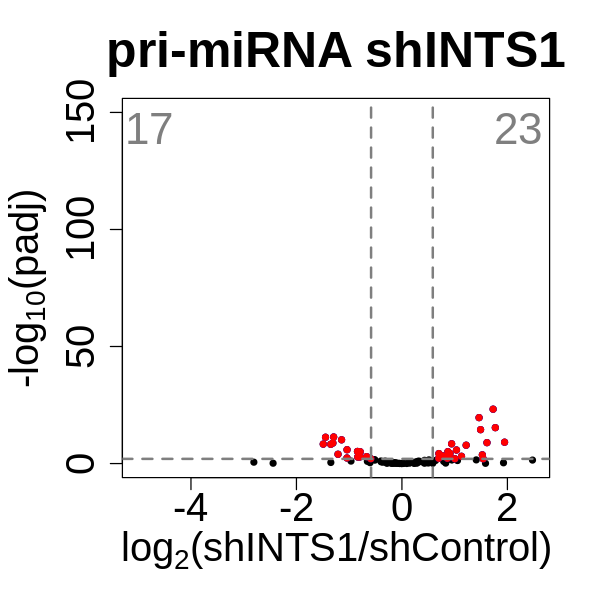

[1] 4


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



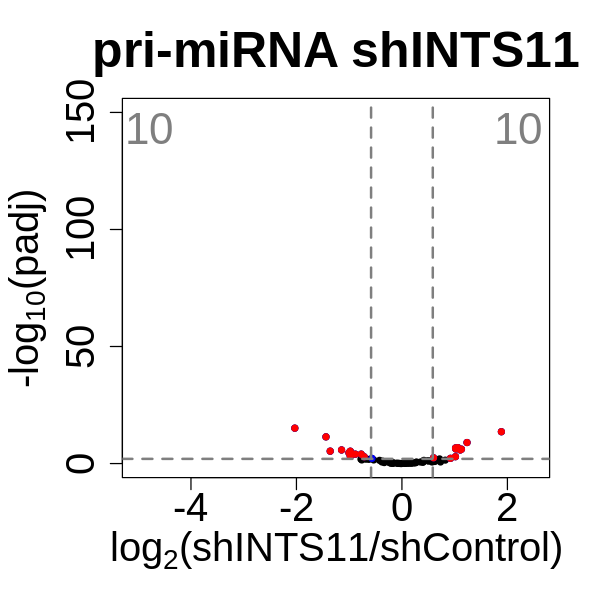

[1] 5


converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



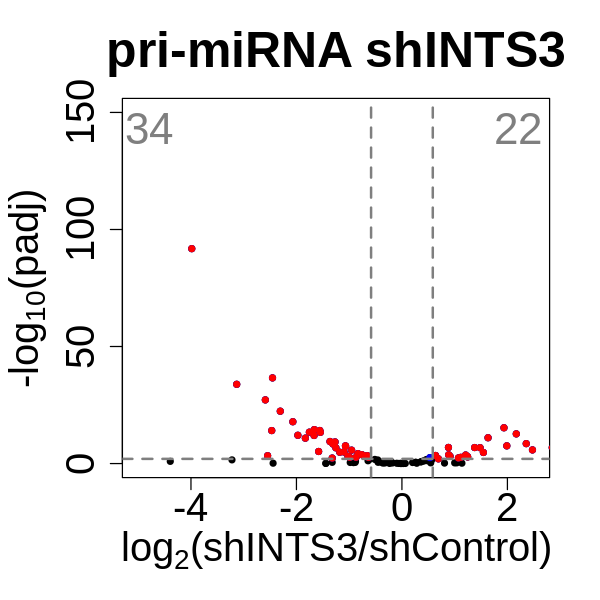

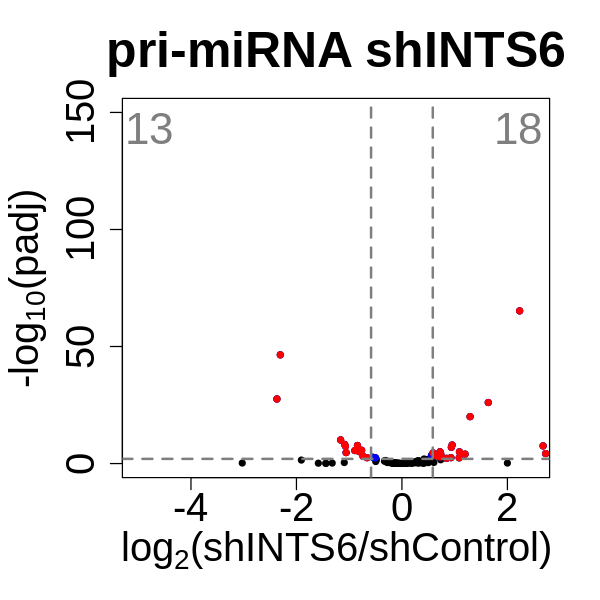

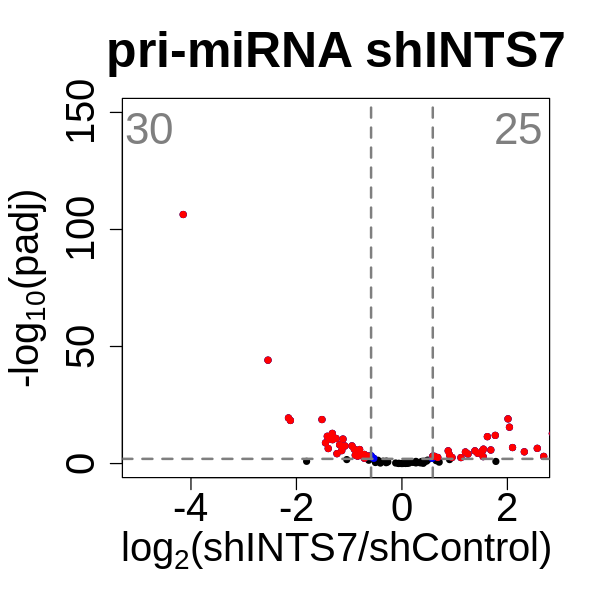

In [49]:
for (i in 1:length(myfiles)){
    print(i)
    #if (i==20) {
    #    next # skips the comparison of shGFP to shGFP
    #}
    
    
    d3 <- DESeqDataSetFromMatrix(countData=get(myfiles[i]), 
                              colData=get(gsub("subs_", "metadata_", myfiles[i])), 
                              design=~dex, tidy = TRUE)
    sizeFactors(d3) <- c(1,1,1,1) # column 6: inputRead normalization

    d3 <- DESeq(d3)
    res_d2 <- results(d3) 
    
    # to extract the baseMean counts per sample for corrlation later
    nam <- gsub("subs_", "means_", myfiles[i])
    assign(nam,assays(d3)[["mu"]])
        

options(repr.plot.width=5, repr.plot.height=5)
#reset par
par(mfrow=c(1,1))


###png(paste0(target.dir, "/volcanoplot_primir_", myfiles[i], ".png"), width=18, height=18, unit="cm", res=600)
#pdf(paste0(target.dir, "/volcanoplot_primir_", myfiles[i], ".pdf"), width=5, height=5)
par(mar=c(5.1, 5.1, 4.1, 2.1)) #order: bottom, left, top, and right. 
# Make a basic volcano plot
with(res_d2, plot(log2FoldChange, -log10(padj), pch=20, main=paste0("pri-miRNA ", true.names[i]), xlim=c(-5,2.5), ylim=c(0,150), 
                     cex.axis =2, cex.lab=2, cex.main=2.5, 
                     xlab=bquote('log'[2]* '('*  .(true.names[i])*'/shControl)'),
                     ylab=expression('-log'[10]*'(padj)')))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.05)
with(subset(res_d2, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_d2, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey50")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey50")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey50")
text(-4.8, 143, nrow(res_d2[which(res_d2$log2FoldChange < -log2(1.5) & res_d2$padj <.01),]), cex=2.2, col="grey50")
text(2.2,143, nrow(res_d2[which(res_d2$log2FoldChange > log2(1.5) & res_d2$padj <.01),]), cex=2.2, col="grey50")

#dev.off()

    
nam <- gsub("subs_", "results_", myfiles[i])
assign(nam, res_d2)
    
}

## volcano siDrosha

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



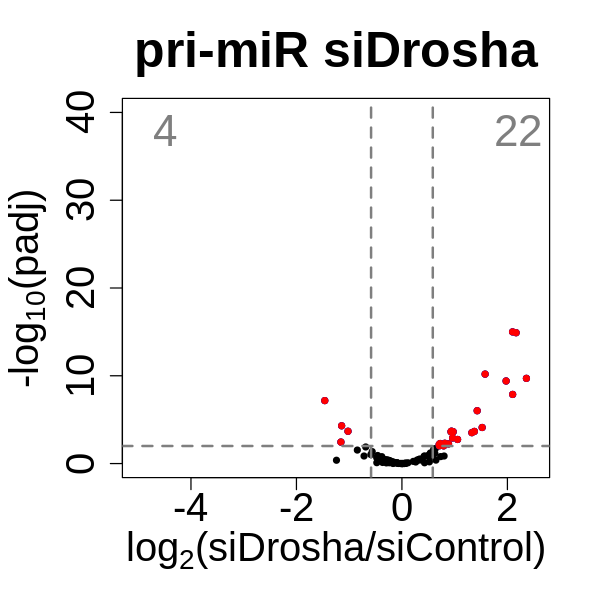

In [50]:
 d3 <- DESeqDataSetFromMatrix(countData=(subs_siDrosha), 
                              colData=(metadata_siDrosha), 
                              design=~dex, tidy = TRUE)
    sizeFactors(d3) <- c(1,1,1,1) # column 6: inputRead normalization

    d3 <- DESeq(d3)
    res_d2 <- results(d3) 
    
    # to extract the baseMean counts per sample for corrlation later
    nam <- "means_siDrosha"
    assign(nam,assays(d3)[["mu"]])
     

options(repr.plot.width=5, repr.plot.height=5)
#reset par
par(mfrow=c(1,1))


###png(paste0(target.dir, "/volcanoplot_primir_subs_siDrosha.png"), width=18, height=18, unit="cm", res=600)
#pdf(paste0(target.dir, "/volcanoplot_primir_subs_siDrosha.pdf"), width=5, height=5)
par(mar=c(5.1, 5.1, 4.1, 2.1)) #order: bottom, left, top, and right. 
# Make a basic volcano plot
with(res_d2, plot(log2FoldChange, -log10(padj), pch=20, main="pri-miR siDrosha", xlim=c(-5,2.5), ylim=c(0,40), 
                     cex.axis =2, cex.lab=2, cex.main=2.5, 
                     xlab=bquote('log'[2]* '(siDrosha/siControl)'),
                     ylab=expression('-log'[10]*'(padj)')))

# Add colored points: blue if padj<0.05, red if log2FC<0.58 and padj<0.05)
with(subset(res_d2, padj<.01 ), points(log2FoldChange, -log10(padj), pch=20, col="blue"))
with(subset(res_d2, padj<.01 & abs(log2FoldChange)>log2(1.5)), points(log2FoldChange, -log10(padj), pch=20, col="red"))
abline(h=-log10(0.01), lty=2, lwd = 2, col= "grey50")
abline(v=-log2(1.5), lty=2, lwd = 2, col= "grey50")
abline(v=log2(1.5), lty=2, lwd = 2, col= "grey50")
text(-4.5, 38, nrow(res_d2[which(res_d2$log2FoldChange < -log2(1.5) & res_d2$padj <.01),]), cex=2.2, col="grey50")
text(2.2,38, nrow(res_d2[which(res_d2$log2FoldChange > log2(1.5) & res_d2$padj <.01),]), cex=2.2, col="grey50")
#with(drosha.indep, text(log2FoldChange ~ -log10(padj), labels = row.names(drosha.indep), pos = 4))

#dev.off()

nam <- "results_siDrosha"
assign(nam, res_d2)


# Boxplot of deseq2 result

In [53]:
my_results <- ls(pattern="results_")
my_results

[1] "results_shINTS1"  "results_shINTS11" "results_shINTS3"  "results_shINTS6" 
[5] "results_shINTS7"  "results_siDrosha"

## Boxplot final shINTS

In [60]:
for (i in 1:length(my_results)){
    
    r <- get(my_results[i])
    f <-  cbind.data.frame(r$log2FoldChange, gsub("results_", "", my_results[i]))
    colnames(f) <- c("log2FC", "item")
    
    nam <- gsub("results_", "box_", my_results[i])
    assign(nam, f)
    
}

In [61]:
ls(pattern="box_")

my_box <- c("box_shINTS1","box_shINTS3", "box_shINTS6","box_shINTS7", "box_shINTS11", 
           "box_siDrosha")
my_box



[1] "box_shINTS1"  "box_shINTS11" "box_shINTS3"  "box_shINTS6"  "box_shINTS7" 
[6] "box_siDrosha"

[1] "box_shINTS1"  "box_shINTS3"  "box_shINTS6"  "box_shINTS7"  "box_shINTS11"
[6] "box_siDrosha"

In [62]:
final <- data.frame(matrix(ncol = 2, nrow = 1))
colnames(final) <- c("log2FC", "item")

for (i in 1:length(my_box)){
    final <- rbind(final, get(my_box[i]))
}

final <- final[-1,]

head(final)

((unique(final$item)))

,log2FC,item
,<dbl>,<chr>
2,1.5401087,shINTS1
3,-1.0419301,shINTS1
4,1.4912427,shINTS1
5,-0.5199337,shINTS1
6,1.7293069,shINTS1
7,0.2779379,shINTS1


[1] "shINTS1"  "shINTS3"  "shINTS6"  "shINTS7"  "shINTS11" "siDrosha"

Warning message:
“Removed 11 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 11 rows containing non-finite values (stat_boxplot).”


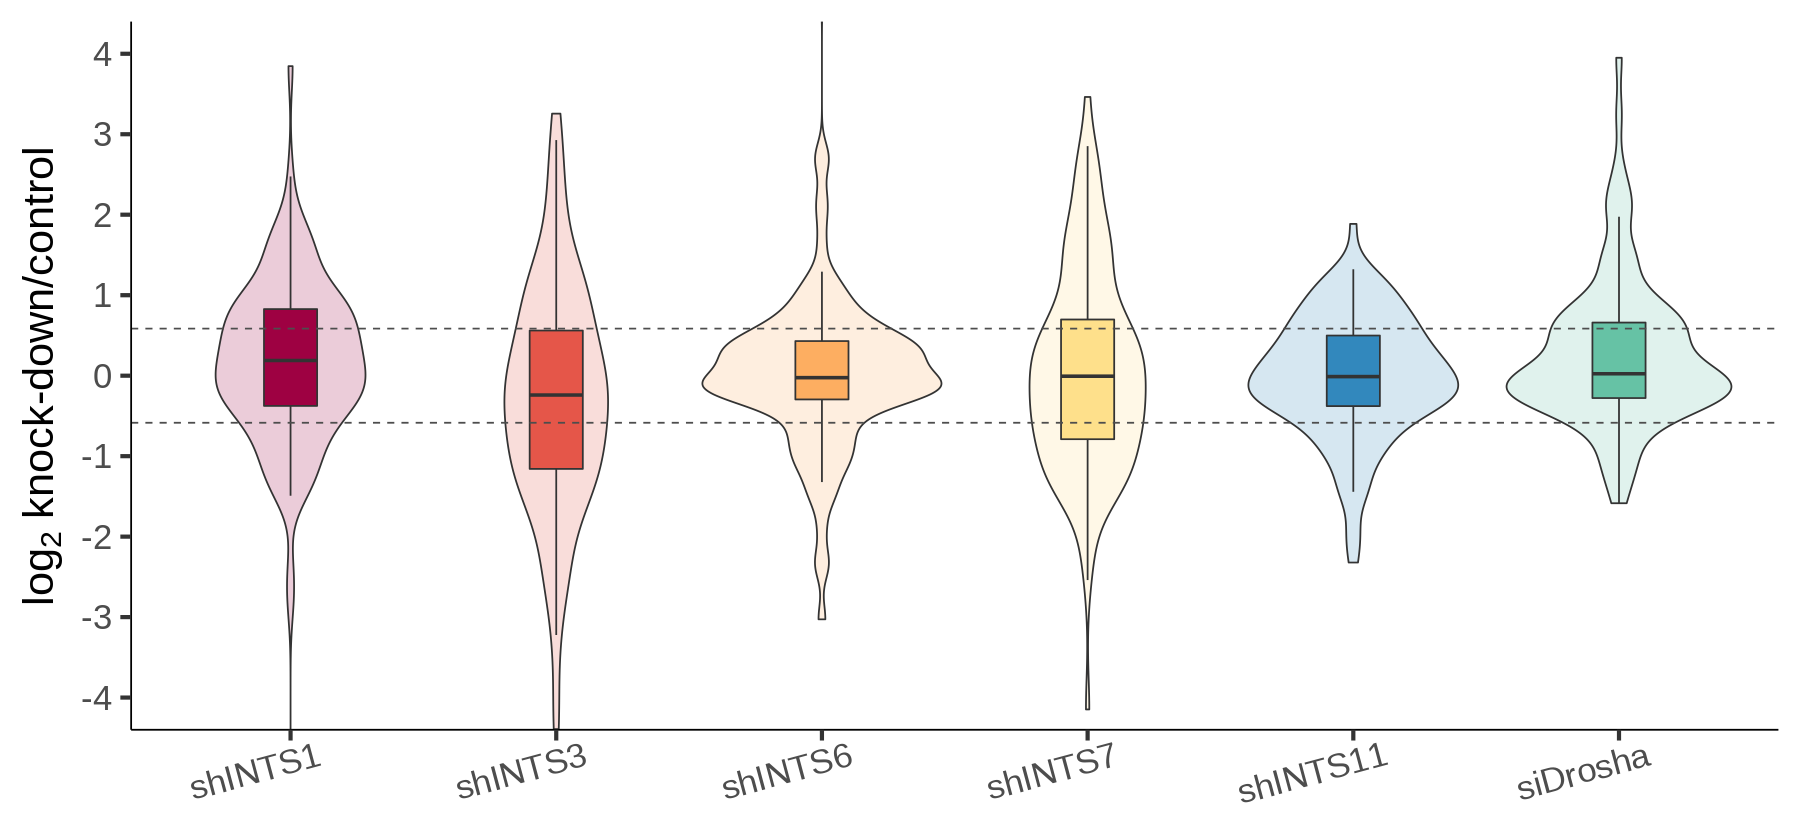

In [63]:
options(repr.plot.width=15, repr.plot.height=7)

INTScolors <- c(col_sh1, col_sh3, col_sh6, col_sh7, col_sh11, col_drosha)


ggplot(data = final, aes(x = item, y = log2FC, fill=item)) +
        theme_bw(base_size = 26) +
        #ggtitle("112 pri-miRNAs; log2FC all samples") +
        #theme(plot.title = element_text(hjust = 0.5)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 0.5), 
              axis.title.x = element_text()) +
        theme(legend.position="none", axis.title.x=element_blank(), text = element_text(), 
              axis.text.x = element_text(angle = 15, hjust = 0.8)) +
        scale_y_continuous(name=bquote('log'[2]* ' knock-down/control'), breaks =seq(from =-4, to=4,by=1)) +
        coord_cartesian(ylim=c(-4,4))+
        geom_violin(alpha=0.2) +
        geom_boxplot(width = 0.2, fill =INTScolors, outlier.color=NA) +
        #geom_dotplot(binaxis="y", stackdir = "center", binwidth = .09) +
        geom_hline(yintercept=range(log2(1.5), -log2(1.5)), color='grey30', size=0.5, lty=2) +
        #stat_summary(fun.y=mean, geom="point", size = 3, color="black") +
        scale_x_discrete(limits=c(unique(final$item))) +
        scale_fill_manual(values=INTScolors, limits=c(unique(final$item)))
       # scale_fill_manual(values=getPalette(colourCount),limits=c(unique(final$item))) # limits orders colors as wanted!!! very useful!
#ggsave(paste0(target.dir, "/boxplot_deseq2_primir_Fig2_INTS_Drosha.pdf"),  width=9.6, height=5)
